# Content of Notebook:
## [Read Data](#section1)<br>
## [Preprocessing](#section2)<br>
## [Model](#section3)<br>
## [Testing ](#section4)<br>

-----------------
<a id=section1></a>
# Read Data


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import math
df=pd.read_excel("Data_Train.xlsx")#orginal data
df_clean=pd.read_csv("clean_data.csv")#cleaning data
df_min_max_duration=pd.read_csv("min_max_duration.csv")#data have min and max duration

In [2]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df_clean.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,year_of_Journey,month_of_Journey,day_of_Journey,Duration_minute
0,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662,2019,5,1,445
1,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882,2019,6,9,1140
2,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No info,6218,2019,5,12,325
3,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1.0,No info,13302,2019,3,1,285
4,SpiceJet,Kolkata,Banglore,CCU → BLR,0.0,No info,3873,2019,6,24,145


In [4]:
df_min_max_duration.head(5)

,Source,Destination,Total_Stops,Min_Duration_minute,Max_Duration_minute
0,Banglore,New Delhi,4.0,1770,1770
1,Mumbai,Hyderabad,3.0,1175,1775
2,Kolkata,Banglore,3.0,805,2115
3,Banglore,New Delhi,3.0,685,2120
4,Delhi,Cochin,3.0,565,2280


-----------------
<a id=section2></a>
# Preprocessing

**in preprocessing i will do :**

1) [**Feature selection**](#section5)</br>

2) [**Check Missing values and duplicted**](#section6)</br>

3) [**Handling outliers in Price**](#section8)</br>

4) [**Create Pipeline content all steps of preprocessing**](#section7)</br>

5) [**DataFrame after preprocessing**](#section12)</br>

-----------------
<a id=section5></a>
### 1)Feature selection

In [5]:
df_pre=df_clean.copy()

In [6]:
df_pre.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'year_of_Journey', 'month_of_Journey',
       'day_of_Journey', 'Duration_minute'],
      dtype='object')

In [7]:
#drop some columns i don't need it 
df_pre.drop(['Route','year_of_Journey'],axis=1,inplace=True)

In [8]:
df_pre.head(5)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month_of_Journey,day_of_Journey,Duration_minute
0,Air India,Kolkata,Banglore,2.0,No info,7662,5,1,445
1,Jet Airways,Delhi,Cochin,2.0,No info,13882,6,9,1140
2,IndiGo,Kolkata,Banglore,1.0,No info,6218,5,12,325
3,IndiGo,Banglore,New Delhi,1.0,No info,13302,3,1,285
4,SpiceJet,Kolkata,Banglore,0.0,No info,3873,6,24,145


-----------------
<a id=section6></a>
### 2)Check Missing values and duplicted

In [9]:
df_pre.isna().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Additional_Info     0
Price               0
month_of_Journey    0
day_of_Journey      0
Duration_minute     0
dtype: int64

In [10]:
df_pre.duplicated().sum()

4

In [11]:
df_pre.drop_duplicates(inplace=True)

-----------------
<a id=section8></a>
### 4)Handling outliers in Price


drop all value grather than or equal 35620.75 (99.9%) in price

In [12]:
df_pre.Price.quantile(0.9990)

35626.000000001986

In [13]:
df_pre=df_pre[df_pre.Price <df_pre.Price.quantile(0.9990)]

In [14]:
df_pre.Price.quantile(0.9990) #check

31825.0

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

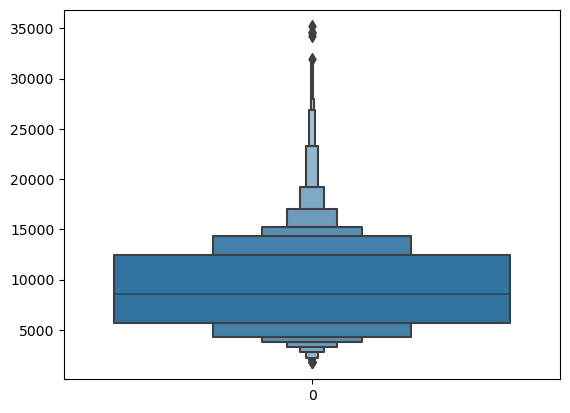

In [15]:
sns.boxenplot(df_pre.Price)

-----------------
<a id=section7></a>
### 4)Create Pipeline content all steps of preprocessing

In Pipeline i will use Binary encoding with all categorical columns and use standrad scaler with all numerical columns

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor

from sklearn.linear_model import LinearRegression 


from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [17]:
x=df_pre.drop("Price",axis=1)
y=df_pre["Price"]

In [18]:
x

,Airline,Source,Destination,Total_Stops,Additional_Info,month_of_Journey,day_of_Journey,Duration_minute
0,Air India,Kolkata,Banglore,2.0,No info,5,1,445
1,Jet Airways,Delhi,Cochin,2.0,No info,6,9,1140
2,IndiGo,Kolkata,Banglore,1.0,No info,5,12,325
3,IndiGo,Banglore,New Delhi,1.0,No info,3,1,285
4,SpiceJet,Kolkata,Banglore,0.0,No info,6,24,145
...,...,...,...,...,...,...,...,...
9580,SpiceJet,Banglore,Delhi,0.0,No check-in baggage included,5,21,160
9581,Air Asia,Kolkata,Banglore,0.0,No info,4,9,150
9582,Air India,Kolkata,Banglore,0.0,No info,4,27,155
9583,Vistara,Banglore,New Delhi,0.0,No info,3,1,160


In [19]:
cate=df_pre.select_dtypes(include="O").columns.tolist()
numercial=df_pre.select_dtypes(exclude="O").columns.drop("Price").tolist() #drop Target 

In [20]:
cate

['Airline', 'Source', 'Destination', 'Additional_Info']

In [21]:
numercial

['Total_Stops', 'month_of_Journey', 'day_of_Journey', 'Duration_minute']

In [22]:
steps_ct=[]#list content steps that process in only ColumnTransformer
steps=[] #list content steps that process in pipeline

steps_ct.append(("binary",BinaryEncoder(),cate))
steps_ct.append(("scaler",StandardScaler(),numercial))
steps.append(("ct",ColumnTransformer(steps_ct)))
#scaling target and put model
steps.append(("TransformedTargetRegressor",TransformedTargetRegressor(regressor=LinearRegression(), transformer=StandardScaler())))
pipline=Pipeline(steps=steps)

In [23]:
pipline

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('binary', BinaryEncoder(),
                                                  ['Airline', 'Source',
                                                   'Destination',
                                                   'Additional_Info']),
                                                 ('scaler', StandardScaler(),
                                                  ['Total_Stops',
                                                   'month_of_Journey',
                                                   'day_of_Journey',
                                                   'Duration_minute'])])),
                ('TransformedTargetRegressor',
                 TransformedTargetRegressor(regressor=LinearRegression(),
                                            transformer=StandardScaler()))])

In [24]:
#to check pipeline run or no
score=cross_validate(pipline,x,y,cv=5,scoring="r2",return_train_score=True)

-----------------------
<a id=section12></a>

## 5)DataFrame after preprocessing


In [25]:
encoder = BinaryEncoder(cols=cate)
df_encoded = encoder.fit_transform(x)

In [26]:
df_encoded

,Airline_0,Airline_1,Airline_2,Airline_3,Source_0,Source_1,Source_2,Destination_0,Destination_1,Destination_2,Total_Stops,Additional_Info_0,Additional_Info_1,Additional_Info_2,Additional_Info_3,month_of_Journey,day_of_Journey,Duration_minute
0,0,0,0,1,0,0,1,0,0,1,2.0,0,0,0,1,5,1,445
1,0,0,1,0,0,1,0,0,1,0,2.0,0,0,0,1,6,9,1140
2,0,0,1,1,0,0,1,0,0,1,1.0,0,0,0,1,5,12,325
3,0,0,1,1,0,1,1,0,1,1,1.0,0,0,0,1,3,1,285
4,0,1,0,0,0,0,1,0,0,1,0.0,0,0,0,1,6,24,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9580,0,1,0,0,0,1,1,1,0,1,0.0,0,0,1,1,5,21,160
9581,1,0,0,0,0,0,1,0,0,1,0.0,0,0,0,1,4,9,150
9582,0,0,0,1,0,0,1,0,0,1,0.0,0,0,0,1,4,27,155
9583,0,1,1,1,0,1,1,0,1,1,0.0,0,0,0,1,3,1,160


-----------------
<a id=section3></a>
# Model

**in Model i will do :**

1) [**Best model**](#section9)</br>

2) [**Hyperparameter tuning**](#section10)</br>

3) [**Features importance**](#section13)</br>

4) [**Save model**](#section11)</br>


In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


In [28]:
models=[]
models.append(("Lr",LinearRegression()))
models.append(("KNN",KNeighborsRegressor()))
models.append(("DTC",DecisionTreeRegressor()))
models.append(("RF",RandomForestRegressor()))
models.append(("GB",GradientBoostingRegressor()))
models.append(("XGB",XGBRegressor()))

In [29]:
for model in models :
    steps_ct=[]#list content steps that process in only ColumnTransformer
    steps=[] #list content steps that process in pipeline

    steps_ct.append(("binary",BinaryEncoder(),cate))
    steps_ct.append(("scaler",StandardScaler(),numercial))
    steps.append(("ct",ColumnTransformer(steps_ct)))
    #scaling target and put model
    steps.append(("TransformedTargetRegressor",TransformedTargetRegressor(regressor=model[1], transformer=StandardScaler())))
    pipline=Pipeline(steps=steps)
    score=cross_validate(pipline,x,y,cv=5,scoring="r2",return_train_score=True)
    print(model[0])
    print("Training accuracy =",score["train_score"].mean())
    print("testing accuracy =",score["test_score"].mean())
    print("*"*50)

Lr
Training accuracy = 0.5362017229747756
testing accuracy = 0.5313709945237146
**************************************************
KNN
Training accuracy = 0.8783555803433641
testing accuracy = 0.8140843955257953
**************************************************
DTC
Training accuracy = 0.9832977978780513
testing accuracy = 0.7895127212145185
**************************************************
RF
Training accuracy = 0.9687277759653508
testing accuracy = 0.857876417622666
**************************************************
GB
Training accuracy = 0.804458469317918
testing accuracy = 0.794615513919369
**************************************************
XGB
Training accuracy = 0.937307259809279
testing accuracy = 0.8731941194152787
**************************************************


-----------
<a id=section9></a>
## 1)Best Model


__XGB Regressor__ is Best Model 

In [30]:
steps_ct=[]#list content steps that process in only ColumnTransformer
steps=[] #list content steps that process in pipeline

steps_ct.append(("binary",BinaryEncoder(),cate))
steps_ct.append(("scaler",StandardScaler(),numercial))
steps.append(("ct",ColumnTransformer(steps_ct)))
#scaling target and put model
steps.append(("TransformedTargetRegressor",TransformedTargetRegressor(regressor=XGBRegressor(), transformer=StandardScaler())))
xgb=Pipeline(steps=steps)

In [31]:
xgb

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('binary', BinaryEncoder(),
                                                  ['Airline', 'Source',
                                                   'Destination',
                                                   'Additional_Info']),
                                                 ('scaler', StandardScaler(),
                                                  ['Total_Stops',
                                                   'month_of_Journey',
                                                   'day_of_Journey',
                                                   'Duration_minute'])])),
                ('TransformedTargetRegressor',
                 TransformedTargetRegressor(regressor=XGBRegressor(base_score=None,
                                                                   booster=None,
                                                                   callba...
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=None,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=None,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=None, ...),
                                            transformer=StandardScaler()))])

--------------------------------------
<a id=section10></a>
## 2)Hyperparameter tuning


**Step 1 : create initial model**

In [32]:
# initial model
XGB=XGBRegressor(learning_rate =0.1,n_estimators=1000,
                  max_depth=5,min_child_weight=1, gamma=0,subsample=0.8,
                  colsample_bytree=0.8,nthread=4,scale_pos_weight=1,seed=27)
steps_ct=[]#list content steps that process in only ColumnTransformer
steps=[] #list content steps that process in pipeline

steps_ct.append(("binary",BinaryEncoder(),cate))
steps_ct.append(("scaler",StandardScaler(),numercial))
steps.append(("ct",ColumnTransformer(steps_ct)))
#scaling target and put model
steps.append(("TransformedTargetRegressor",TransformedTargetRegressor(regressor=XGB, transformer=StandardScaler())))
XGB=Pipeline(steps=steps)

In [33]:
XGB

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('binary', BinaryEncoder(),
                                                  ['Airline', 'Source',
                                                   'Destination',
                                                   'Additional_Info']),
                                                 ('scaler', StandardScaler(),
                                                  ['Total_Stops',
                                                   'month_of_Journey',
                                                   'day_of_Journey',
                                                   'Duration_minute'])])),
                ('TransformedTargetRegressor',
                 TransformedTargetRegressor(regressor=XGBRegressor(base_score=None,
                                                                   booster=None,
                                                                   callba...
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.1,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=5,
                                                                   max_leaves=None,
                                                                   min_child_weight=1,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=1000,
                                                                   n_jobs=None,
                                                                   nthread=4,
                                                                   num_parallel_tree=None, ...),
                                            transformer=StandardScaler()))])

In [34]:
score_initial=cross_validate(XGB,x,y,cv=5,scoring="r2",return_train_score=True)
print("Training accuracy of initial model =",score_initial["train_score"].mean())
print("testing accuracy of initial model =",score_initial["test_score"].mean())

Training accuracy of initial model = 0.9467114125840747
testing accuracy of initial model = 0.8731966944892131


--------------------
**Step 2: Tune max_depth .**

In [35]:
param_test1 = {'TransformedTargetRegressor__regressor__max_depth':range(3,10,2)}


In [36]:
gsearch1=GridSearchCV(estimator = XGB, param_grid = param_test1, scoring='r2',cv=5)

In [37]:
gsearch1.fit(x,y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('binary',
                                                                         BinaryEncoder(),
                                                                         ['Airline',
                                                                          'Source',
                                                                          'Destination',
                                                                          'Additional_Info']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['Total_Stops',
                                                                          'month_of_Journey',
                                                                          'day_of_Journey',
                                                                          'Duration_minute'])])),
                                       ('TransformedTargetRegressor',
                                        TransformedTargetRegressor(regressor=XGBRegressor(base_sc...
                                                                                          max_cat_threshold=None,
                                                                                          max_cat_to_onehot=None,
                                                                                          max_delta_step=None,
                                                                                          max_depth=5,
                                                                                          max_leaves=None,
                                                                                          min_child_weight=1,
                                                                                          missing=nan,
                                                                                          monotone_constraints=None,
                                                                                          multi_strategy=None,
                                                                                          n_estimators=1000,
                                                                                          n_jobs=None,
                                                                                          nthread=4,
                                                                                          num_parallel_tree=None, ...),
                                                                   transformer=StandardScaler()))]),
             param_grid={'TransformedTargetRegressor__regressor__max_depth': range(3, 10, 2)},
             scoring='r2')

In [38]:
#best parameter
print("Best parameter in XGB 1",gsearch1.best_params_)


Best parameter in XGB 1 {'TransformedTargetRegressor__regressor__max_depth': 5}


In [39]:
score1=cross_validate(gsearch1.best_estimator_,x,y,cv=5,scoring="r2",return_train_score=True)

In [40]:
print("Training accuracy of XGB 1 =",score1["train_score"].mean())
print("Testing accuracy of XGB 1 =",score1["test_score"].mean())

Training accuracy of XGB 1 = 0.9467114125840747
Testing accuracy of XGB 1 = 0.8731966944892131


----------------
**Step 3: Tune gamma.**

In [41]:
param_test2 = {'TransformedTargetRegressor__regressor__gamma':[i/10.0 for i in range(0,5)]}
gsearch2=GridSearchCV(estimator = gsearch1.best_estimator_, param_grid = param_test2, scoring='r2',cv=5)

In [42]:
gsearch2.fit(x,y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('binary',
                                                                         BinaryEncoder(),
                                                                         ['Airline',
                                                                          'Source',
                                                                          'Destination',
                                                                          'Additional_Info']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['Total_Stops',
                                                                          'month_of_Journey',
                                                                          'day_of_Journey',
                                                                          'Duration_minute'])])),
                                       ('TransformedTargetRegressor',
                                        TransformedTargetRegressor(regressor=XGBRegressor(base_sc...
                                                                                          max_cat_threshold=None,
                                                                                          max_cat_to_onehot=None,
                                                                                          max_delta_step=None,
                                                                                          max_depth=5,
                                                                                          max_leaves=None,
                                                                                          min_child_weight=1,
                                                                                          missing=nan,
                                                                                          monotone_constraints=None,
                                                                                          multi_strategy=None,
                                                                                          n_estimators=1000,
                                                                                          n_jobs=None,
                                                                                          nthread=4,
                                                                                          num_parallel_tree=None, ...),
                                                                   transformer=StandardScaler()))]),
             param_grid={'TransformedTargetRegressor__regressor__gamma': [0.0,
                                                                          0.1,
                                                                          0.2,
                                                                          0.3,
                                                                          0.4]},
             scoring='r2')

In [43]:
#best parameter
print("Best parameter in XGB 2",gsearch2.best_params_)


Best parameter in XGB 2 {'TransformedTargetRegressor__regressor__gamma': 0.1}


In [44]:
score2=cross_validate(gsearch2.best_estimator_,x,y,cv=5,scoring="r2",return_train_score=True)


In [45]:
print("Training accuracy of XGB 2 =",score2["train_score"].mean())
print("Testing accuracy of XGB 2 =",score2["test_score"].mean())

Training accuracy of XGB 2 = 0.9228275171976342
Testing accuracy of XGB 2 = 0.8739327779284565


--------------
**Step 4: Tune subsample and colsample_bytree**

In [46]:
param_test3 = {
 'TransformedTargetRegressor__regressor__subsample':[i/10.0 for i in range(6,10)],
 'TransformedTargetRegressor__regressor__colsample_bytree':[i/10.0 for i in range(6,10)]}
gsearch3=GridSearchCV(estimator = gsearch2.best_estimator_, param_grid = param_test3, scoring='r2',cv=5)

In [47]:
gsearch3.fit(x,y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('binary',
                                                                         BinaryEncoder(),
                                                                         ['Airline',
                                                                          'Source',
                                                                          'Destination',
                                                                          'Additional_Info']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['Total_Stops',
                                                                          'month_of_Journey',
                                                                          'day_of_Journey',
                                                                          'Duration_minute'])])),
                                       ('TransformedTargetRegressor',
                                        TransformedTargetRegressor(regressor=XGBRegressor(base_sc...
                                                                                          max_leaves=None,
                                                                                          min_child_weight=1,
                                                                                          missing=nan,
                                                                                          monotone_constraints=None,
                                                                                          multi_strategy=None,
                                                                                          n_estimators=1000,
                                                                                          n_jobs=None,
                                                                                          nthread=4,
                                                                                          num_parallel_tree=None, ...),
                                                                   transformer=StandardScaler()))]),
             param_grid={'TransformedTargetRegressor__regressor__colsample_bytree': [0.6,
                                                                                     0.7,
                                                                                     0.8,
                                                                                     0.9],
                         'TransformedTargetRegressor__regressor__subsample': [0.6,
                                                                              0.7,
                                                                              0.8,
                                                                              0.9]},
             scoring='r2')

In [48]:
#best parameter
print("Best parameter in XGB 3",gsearch3.best_params_)


Best parameter in XGB 3 {'TransformedTargetRegressor__regressor__colsample_bytree': 0.9, 'TransformedTargetRegressor__regressor__subsample': 0.8}


In [49]:
score3=cross_validate(gsearch3.best_estimator_,x,y,cv=5,scoring="r2",return_train_score=True)


In [50]:
print("Training accuracy of XGB 3 =",score3["train_score"].mean())
print("Testing accuracy of XGB 3 =",score3["test_score"].mean())

Training accuracy of XGB 3 = 0.9255950444847452
Testing accuracy of XGB 3 = 0.8745158600423769


---------------
**Step 5: Tuning regularization parameters**

In [51]:
param_test4 = {'TransformedTargetRegressor__regressor__reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

gsearch4=GridSearchCV(estimator = gsearch3.best_estimator_, param_grid = param_test4, scoring='r2',cv=5)

In [52]:
gsearch4.fit(x,y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('binary',
                                                                         BinaryEncoder(),
                                                                         ['Airline',
                                                                          'Source',
                                                                          'Destination',
                                                                          'Additional_Info']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['Total_Stops',
                                                                          'month_of_Journey',
                                                                          'day_of_Journey',
                                                                          'Duration_minute'])])),
                                       ('TransformedTargetRegressor',
                                        TransformedTargetRegressor(regressor=XGBRegressor(base_sc...
                                                                                          max_cat_threshold=None,
                                                                                          max_cat_to_onehot=None,
                                                                                          max_delta_step=None,
                                                                                          max_depth=5,
                                                                                          max_leaves=None,
                                                                                          min_child_weight=1,
                                                                                          missing=nan,
                                                                                          monotone_constraints=None,
                                                                                          multi_strategy=None,
                                                                                          n_estimators=1000,
                                                                                          n_jobs=None,
                                                                                          nthread=4,
                                                                                          num_parallel_tree=None, ...),
                                                                   transformer=StandardScaler()))]),
             param_grid={'TransformedTargetRegressor__regressor__reg_alpha': [1e-05,
                                                                              0.01,
                                                                              0.1,
                                                                              1,
                                                                              100]},
             scoring='r2')

In [53]:
#best parameter
print("Best parameter in XGB 4",gsearch4.best_params_)


Best parameter in XGB 4 {'TransformedTargetRegressor__regressor__reg_alpha': 0.01}


In [54]:
score4=cross_validate(gsearch4.best_estimator_,x,y,cv=5,scoring="r2",return_train_score=True)


In [55]:
print("Training accuracy of XGB 4 =",score4["train_score"].mean())
print("Testing accuracy of XGB 4 =",score4["test_score"].mean())

Training accuracy of XGB 4 = 0.925421144136471
Testing accuracy of XGB 4 = 0.8756379013797295


----------------------

**Step 6 : Tuning n_estimators**

In [56]:
param_test5 = {'TransformedTargetRegressor__regressor__n_estimators':[1000,1400,1500,1600,1700]}

gsearch5=GridSearchCV(estimator = gsearch4.best_estimator_, param_grid = param_test5, scoring='r2',cv=5)

In [57]:
gsearch5.fit(x,y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('binary',
                                                                         BinaryEncoder(),
                                                                         ['Airline',
                                                                          'Source',
                                                                          'Destination',
                                                                          'Additional_Info']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['Total_Stops',
                                                                          'month_of_Journey',
                                                                          'day_of_Journey',
                                                                          'Duration_minute'])])),
                                       ('TransformedTargetRegressor',
                                        TransformedTargetRegressor(regressor=XGBRegressor(base_sc...
                                                                                          max_cat_to_onehot=None,
                                                                                          max_delta_step=None,
                                                                                          max_depth=5,
                                                                                          max_leaves=None,
                                                                                          min_child_weight=1,
                                                                                          missing=nan,
                                                                                          monotone_constraints=None,
                                                                                          multi_strategy=None,
                                                                                          n_estimators=1000,
                                                                                          n_jobs=None,
                                                                                          nthread=4,
                                                                                          num_parallel_tree=None, ...),
                                                                   transformer=StandardScaler()))]),
             param_grid={'TransformedTargetRegressor__regressor__n_estimators': [1000,
                                                                                 1400,
                                                                                 1500,
                                                                                 1600,
                                                                                 1700]},
             scoring='r2')

In [58]:
#best parameter
print("Best parameter in XGB ",gsearch5.best_params_)


Best parameter in XGB  {'TransformedTargetRegressor__regressor__n_estimators': 1400}


In [59]:
score5=cross_validate(gsearch5.best_estimator_,x,y,cv=5,scoring="r2",return_train_score=True)


In [60]:
print("Training accuracy of XGB 5 =",score5["train_score"].mean())
print("Testing accuracy of XGB 5 =",score5["test_score"].mean())

Training accuracy of XGB 5 = 0.9282398599265618
Testing accuracy of XGB 5 = 0.8757984294856399


-------------
### **The final accuracy before and after tuning :**

In [61]:
print("Training accuracy of before tuning =",score["train_score"].mean().round(4))
print("Testing accuracy of before tuning =",score["test_score"].mean().round(4))
print("*"*50)
print("Training accuracy of after tuning  =",score5["train_score"].mean().round(4))
print("Testing accuracy of after tuning =",score5["test_score"].mean().round(4))

Training accuracy of before tuning = 0.9373
Testing accuracy of before tuning = 0.8732
**************************************************
Training accuracy of after tuning  = 0.9282
Testing accuracy of after tuning = 0.8758


----------
<a id=section13></a>
## 3)Features importance

In [62]:
regressor=gsearch5.best_estimator_.steps[1][1]
regressor

TransformedTargetRegressor(regressor=XGBRegressor(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=0.9,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None, gamma=0.1,
                                                  grow_policy=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learning_rate=0.1,
                                                  max_bin=None,
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=5, max_leaves=None,
                                                  min_child_weight=1,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=1400,
                                                  n_jobs=None, nthread=4,
                                                  num_parallel_tree=None, ...),
                           transformer=StandardScaler())

In [63]:
base_regressor_importances =regressor.regressor_.feature_importances_
base_regressor_importances

array([0.07537779, 0.07955892, 0.08078375, 0.09441263, 0.01926782,
       0.04051975, 0.02974092, 0.02077405, 0.02956152, 0.01741139,
       0.00983833, 0.03253327, 0.06370777, 0.12224534, 0.07731249,
       0.05310057, 0.05845339, 0.09540028], dtype=float32)

In [64]:
base_regressor_importances.shape

(18,)

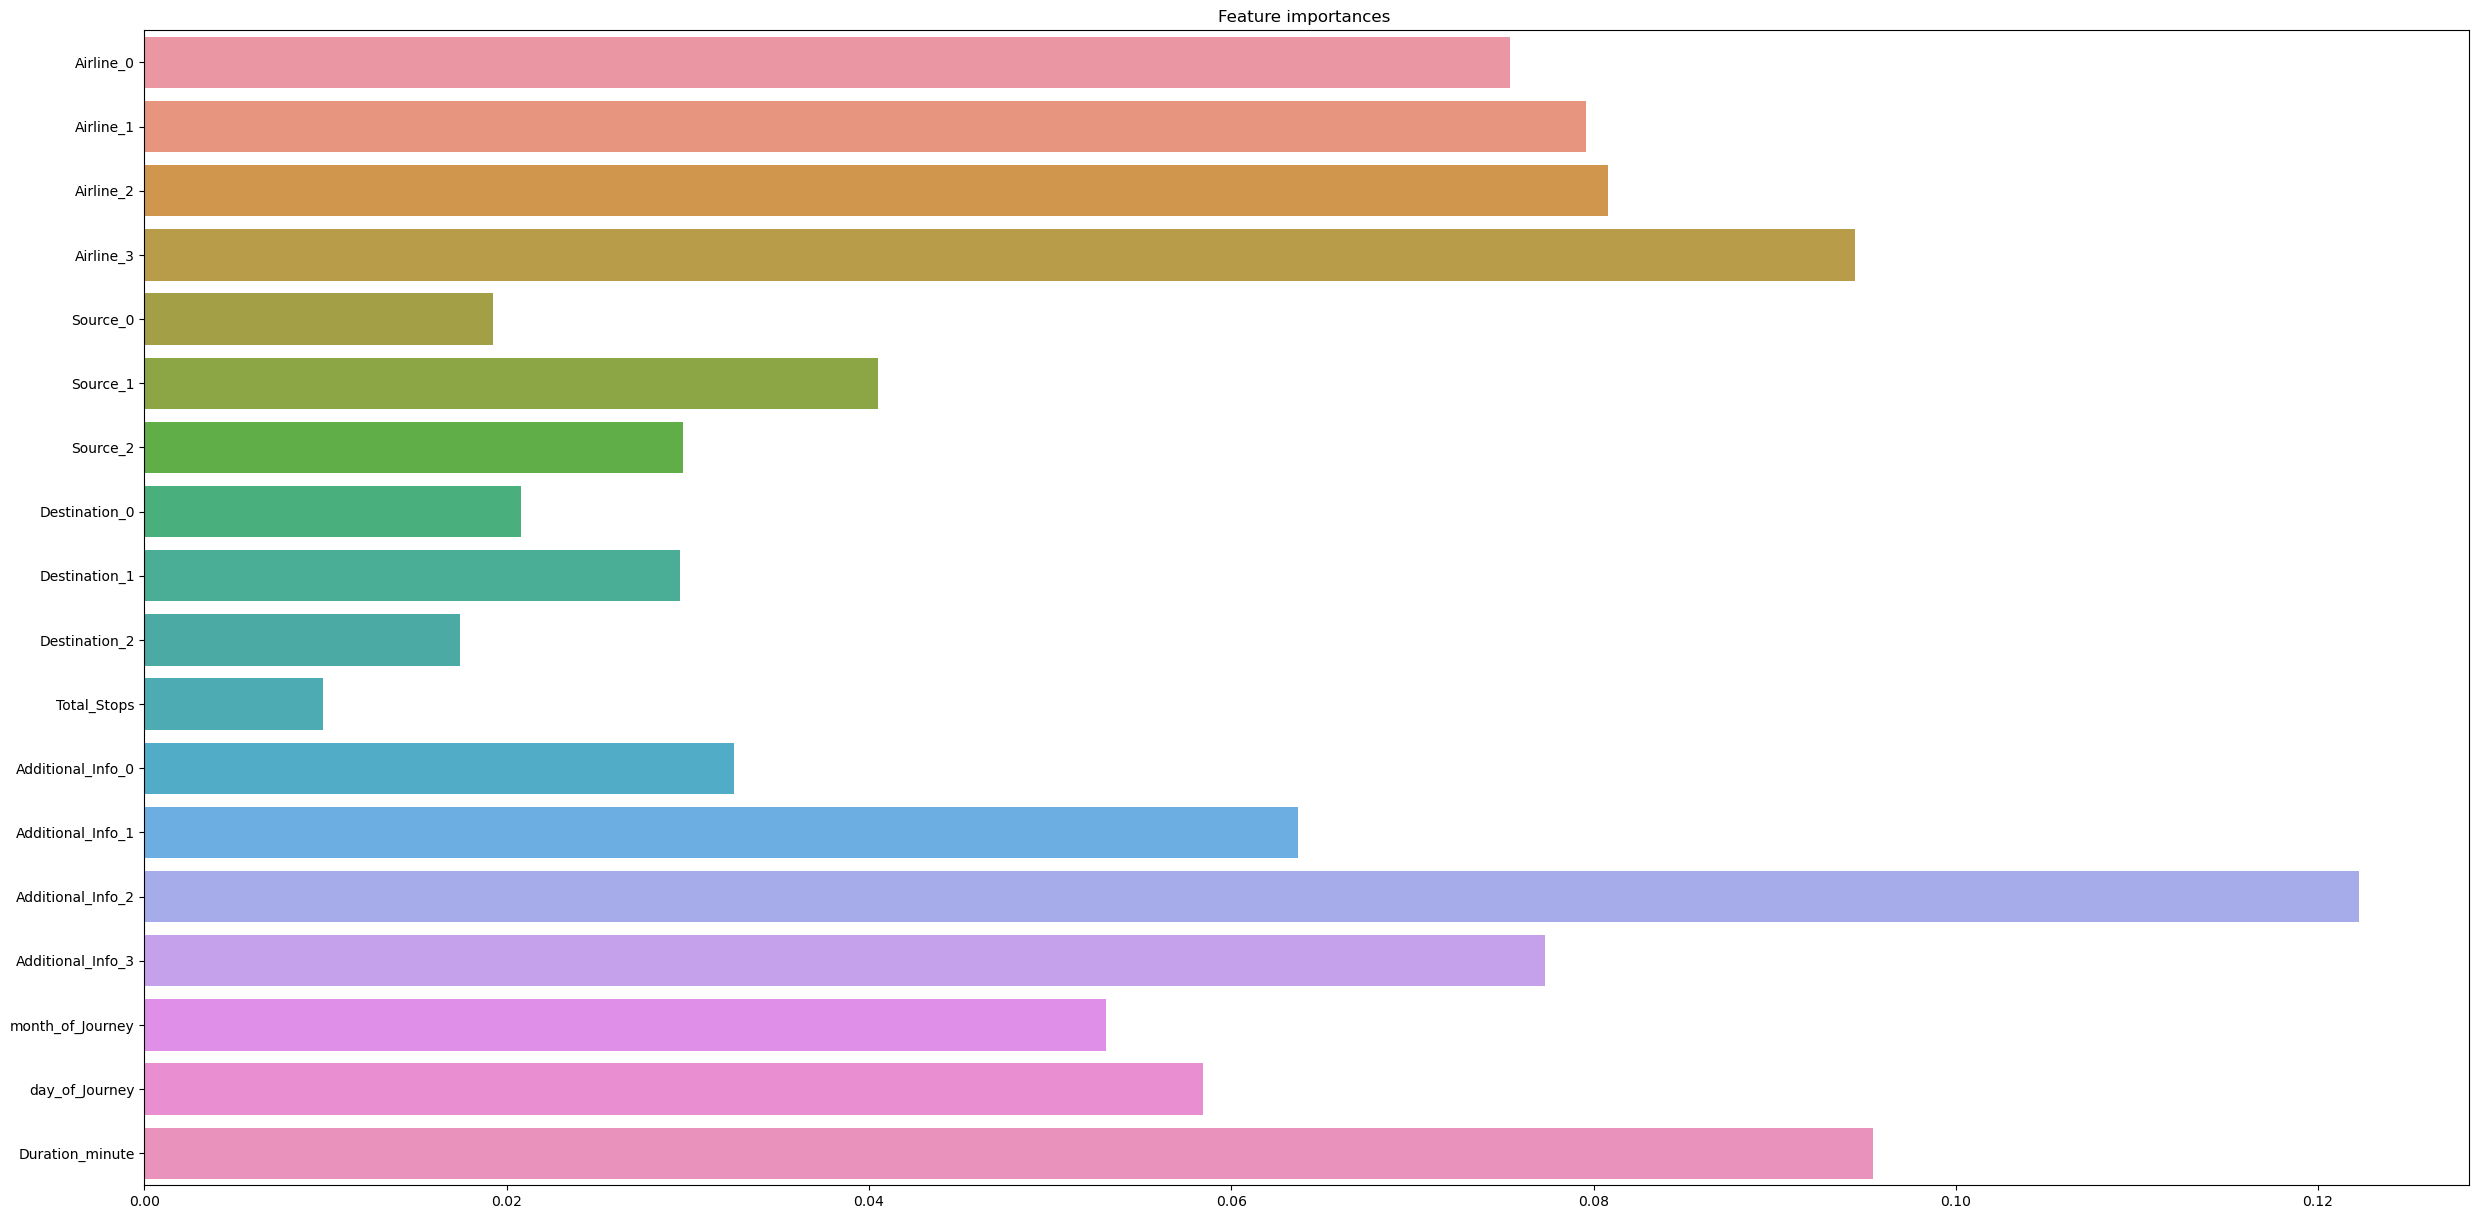

In [65]:
plt.figure(figsize=(30,15))
sns.barplot(x=base_regressor_importances,y=df_encoded.columns)
plt.title("Feature importances ")
plt.show()

--------------------------------------
<a id=section11></a>
## 4)Save model

In [66]:
model=gsearch5.best_estimator_
model.fit(x,y)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('binary', BinaryEncoder(),
                                                  ['Airline', 'Source',
                                                   'Destination',
                                                   'Additional_Info']),
                                                 ('scaler', StandardScaler(),
                                                  ['Total_Stops',
                                                   'month_of_Journey',
                                                   'day_of_Journey',
                                                   'Duration_minute'])])),
                ('TransformedTargetRegressor',
                 TransformedTargetRegressor(regressor=XGBRegressor(base_score=None,
                                                                   booster=None,
                                                                   callba...
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.1,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=5,
                                                                   max_leaves=None,
                                                                   min_child_weight=1,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=1400,
                                                                   n_jobs=None,
                                                                   nthread=4,
                                                                   num_parallel_tree=None, ...),
                                            transformer=StandardScaler()))])

In [67]:
import joblib
joblib.dump(model,"model.pkl")#save model
joblib.dump(x.columns,"input.pkl")#save input columns

['input.pkl']

-----------------
<a id=section4></a>
# Testing


In [68]:
demo=joblib.load("model.pkl") #load model
inputs=joblib.load("input.pkl") #load input

In [69]:
sample=df_clean.sample(1).to_dict()
sample

{'Airline': {3347: 'Jet Airways'},
 'Source': {3347: 'Kolkata'},
 'Destination': {3347: 'Banglore'},
 'Route': {3347: 'CCU → BOM → BLR'},
 'Total_Stops': {3347: 1.0},
 'Additional_Info': {3347: 'In-flight meal not included'},
 'Price': {3347: 10844},
 'year_of_Journey': {3347: 2019},
 'month_of_Journey': {3347: 5},
 'day_of_Journey': {3347: 18},
 'Duration_minute': {3347: 685}}

In [70]:
x.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'month_of_Journey', 'day_of_Journey', 'Duration_minute'],
      dtype='object')

In [71]:
data=pd.DataFrame(columns=inputs)
data.at[0,'Airline']='Air India'
data.at[0,'Source']='Delhi'
data.at[0,'Destination']='Cochin'
data.at[0,'Total_Stops']=1
data.at[0,'Additional_Info']='No info'
data.at[0,'month_of_Journey']=6
data.at[0,'day_of_Journey']=6
data.at[0,'Duration_minute']=570
data

,Airline,Source,Destination,Total_Stops,Additional_Info,month_of_Journey,day_of_Journey,Duration_minute
0,Air India,Delhi,Cochin,1,No info,6,6,570


In [72]:
print("Price of ticket =",round(demo.predict(data)[0],2))

Price of ticket = 9206.98


In [73]:
df_min_max_duration

,Source,Destination,Total_Stops,Min_Duration_minute,Max_Duration_minute
0,Banglore,New Delhi,4.0,1770,1770
1,Mumbai,Hyderabad,3.0,1175,1775
2,Kolkata,Banglore,3.0,805,2115
3,Banglore,New Delhi,3.0,685,2120
4,Delhi,Cochin,3.0,565,2280
5,Delhi,Cochin,2.0,425,2860
6,Banglore,New Delhi,2.0,420,2420
7,Kolkata,Banglore,2.0,335,2480
8,Delhi,Cochin,1.0,265,1685
9,Banglore,New Delhi,1.0,240,1730


In [74]:
print(f'Hour of trip = {math.floor(data["Duration_minute"].values[0]/60)}')

Hour of trip = 9


In [75]:
Min_Duration_minute=df_min_max_duration[(df_min_max_duration["Source"]==data["Source"][0]) & (df_min_max_duration["Destination"]==data["Destination"][0]) & (df_min_max_duration["Total_Stops"]==data["Total_Stops"][0])]["Min_Duration_minute"].values[0]
Min_Duration_minute

265

In [76]:
print(f'Hour = {math.floor(Min_Duration_minute/60)}')

Hour = 4


In [77]:
Max_Duration_minute=df_min_max_duration[(df_min_max_duration["Source"]==data["Source"][0]) & (df_min_max_duration["Destination"]==data["Destination"][0]) & (df_min_max_duration["Total_Stops"]==data["Total_Stops"][0])]["Max_Duration_minute"].values[0]
Max_Duration_minute

1685

In [78]:
print(f'Hour = {math.floor(Max_Duration_minute/60)}')

Hour = 28


That mean value of Duration_minute must between (Min_Duration_minute , Max_Duration_minute)